## LUNG CANCER RISK PREDICTION 

## OBJECTIVES AND EXPECTED OUTCOMES

## OBJECTIVES
Develop a Predictive Model: train a machine learning algorithms that can identify patterns and correlations between risk factors and the likelihood 
of developing lung cancer.

Enable Personalized Risk Assessment and Support Early Intervention: Leverage patient-specific data to deliver probability-driven predictions tailored
to individual profiles. This system will help healthcare professionals identify high-risk individuals at an early stage, enabling timely diagnostic tests, preventive care, and personalized treatment plans to improve patient outcomes and reduce the burden of late-stage cancer management.

Perform Feature Importance Analysis: Conduct systematic analysis to determine which variables (e.g., smoking history, oxygen saturation, energy levels)
have the most significant impact on lung cancer risk prediction. Use this information to enhance model interpretability and guide clinical interventions.

## EXPECTED OUTCOMES
Accurate Lung Cancer Risk Predictions: Deliver a predictive model capable of calculating precise probabilities of lung cancer risk for individual patients, ensuring clinical-grade reliability.

Identification of Key Risk Factors: Pinpoint critical predictors such as smoking, oxygen saturation, energy levels, and family history to inform targeted interventions and treatments.

Early Detection Capability: Provide healthcare professionals with tools to identify high-risk patients early, enabling proactive care and reducing late-stage cancer diagnoses.

Actionable Clinical Insights: Equip clinicians with clear, data-backed recommendations based on feature importance analysis, supporting informed decision-making.


## PERFORMANCE METRICS

Precision: measures the proportion of true positive predictions among all positive predictions made by the model. It is crucial for scenarios where 
false positives (incorrectly identifying a patient as high-risk) need to be minimized.

Recall or sensitivity: focuses on the ability of the model to correctly identify all actual positive cases. It highlights how well the model captures 
high-risk patients who truly have the condition or are at significant risk.

F1-Score: combines precision and recall into a single metric by calculating their harmonic mean. It provides a balanced measure of the model's 
performance, especially in situations where there is a tradeoff between precision and recall. The F1-Score is particularly valuable in healthcare 
settings where both false positives and false negatives can have significant consequences.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC):  evaluates how well the model distinguishes between positive and negative cases at 
various probability thresholds.

## DATA PREPARATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

ModuleNotFoundError: No module named 'lightgbm'

In [6]:
Data = pd.read_csv("Lung Cancer Dataset.csv")

In [8]:
Data

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


In [10]:
Data.shape

(5000, 18)

In [12]:
Data.info

<bound method DataFrame.info of       AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178                0   
1

## Check for null values

In [14]:
Data.isnull().sum() # NO NULL VALUES FOUND

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

## Check for duplicated entries

In [16]:
Data.duplicated().sum() # NO DUPLICATES FOUND

0

In [18]:
Data.dtypes

AGE                         int64
GENDER                      int64
SMOKING                     int64
FINGER_DISCOLORATION        int64
MENTAL_STRESS               int64
EXPOSURE_TO_POLLUTION       int64
LONG_TERM_ILLNESS           int64
ENERGY_LEVEL              float64
IMMUNE_WEAKNESS             int64
BREATHING_ISSUE             int64
ALCOHOL_CONSUMPTION         int64
THROAT_DISCOMFORT           int64
OXYGEN_SATURATION         float64
CHEST_TIGHTNESS             int64
FAMILY_HISTORY              int64
SMOKING_FAMILY_HISTORY      int64
STRESS_IMMUNE               int64
PULMONARY_DISEASE          object
dtype: object

## CHECK FOR OUTLIERS

In [16]:
columns_to_check = ["AGE", "ENERGY_LEVEL", "OXYGEN_SATURATION"]

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [20]:
outliers_dict = {}
for col in columns_to_check:
    outliers_dict[col] = detect_outliers_iqr(Data, col)

In [22]:
for col, outliers in outliers_dict.items():
    print(f"outliers in {col}:\n", outliers, "\n")

outliers in AGE:
       AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178                0   
1              

## ~THE OUTLIERS DETECTED IN AGE SHOULD BE LEFT ALONE BECAUSE THEY CAN PROVIDE VALUABLE INSIGHTS AND THEY ARE NOT EXTREME (MINIMUM AGE=30, MAXIMUM AGE=84)
## ~THE OUTLIER DETECTED IN OXYGEN SATURATION SHOULD ALSO BE LEFT ALONE SINCE IT IS WITHIN NORMAL PHYSIOLOGICAL RANGE BUT SHOULD BE SCALED FOR THE PURPOSE OF MACHINE LEARNING (MIN = 89.92312, MAX = 99.79579)

## ~HOWEVER, THE OUTLIERS DETECTED IN ENERGY LEVELS SHOULD BE WINZORIZE(CAPPED) SINCE IT IS A CONTINUOS VARIABLE AND CAN VARY SIGINIFICANTLY.

In [24]:
%matplotlib inline

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

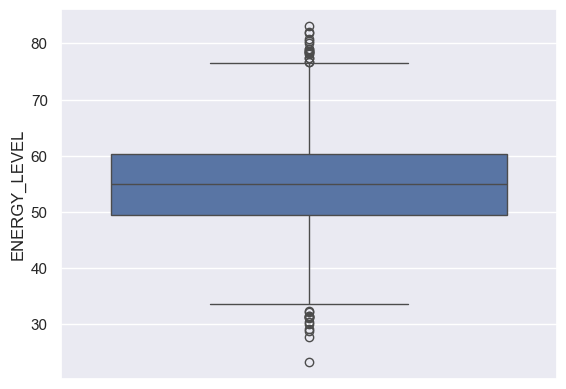

In [28]:
sns.boxplot(Data['ENERGY_LEVEL'])
plt.show()

In [30]:
Q1 = Data['ENERGY_LEVEL'].quantile(0.25)
Q3 = Data['ENERGY_LEVEL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = Data[(Data['ENERGY_LEVEL'] < lower_bound) | (Data['ENERGY_LEVEL'] > upper_bound)]
print("outliers detected:\n", outliers['ENERGY_LEVEL'])

outliers detected:
 249     77.325987
441     32.294964
603     83.046971
758     31.117897
1103    78.129695
1177    31.516073
1282    31.378963
1368    82.057943
1439    30.432088
1487    80.735869
1640    30.144592
1698    28.881348
1866    76.727180
1877    29.183424
2046    78.217365
2126    80.120569
2637    78.437421
2753    77.336479
2960    78.951241
3124    31.359792
3125    76.663553
3326    27.764108
3531    78.552928
3661    31.530124
3731    78.693280
3968    81.763798
4119    79.052641
4513    23.258308
4678    32.273260
4755    80.459028
4906    78.402243
Name: ENERGY_LEVEL, dtype: float64


In [32]:
# APPLYING WINAORIZATION
Data['ENERGY_LEVEL'] = np.where(Data['ENERGY_LEVEL'] < lower_bound, lower_bound, Data['ENERGY_LEVEL'])
Data['ENERGY_LEVEL'] = np.where(Data['ENERGY_LEVEL'] > upper_bound, upper_bound, Data['ENERGY_LEVEL'])
print("New Min:", Data['ENERGY_LEVEL']. min())
print("New Max:", Data['ENERGY_LEVEL']. max())

New Min: 33.11673302249999
New Max: 76.64727206250001


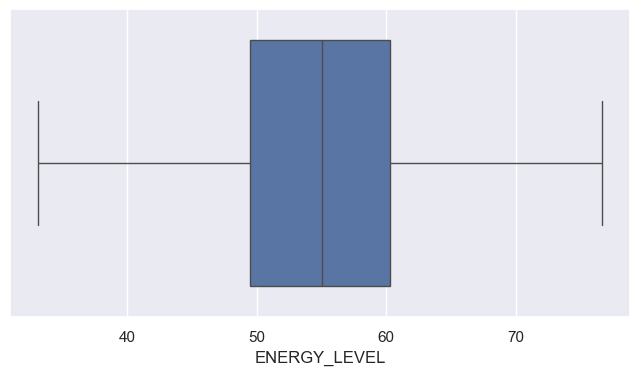

In [34]:
# CONFIRM IF THERE ARE STILL OUTLIERS
plt.figure(figsize=(8, 4))
sns.boxplot(x = Data['ENERGY_LEVEL'])
plt.show()

## CHECK FOR NEGATIVE VALUES 

In [36]:
negative_values = Data[Data.select_dtypes(include = [np.number]) < 0].dropna(how = "all")
print("negative values in dataset:\n", negative_values)

negative values in dataset:
 Empty DataFrame
Columns: [AGE, GENDER, SMOKING, FINGER_DISCOLORATION, MENTAL_STRESS, EXPOSURE_TO_POLLUTION, LONG_TERM_ILLNESS, ENERGY_LEVEL, IMMUNE_WEAKNESS, BREATHING_ISSUE, ALCOHOL_CONSUMPTION, THROAT_DISCOMFORT, OXYGEN_SATURATION, CHEST_TIGHTNESS, FAMILY_HISTORY, SMOKING_FAMILY_HISTORY, STRESS_IMMUNE, PULMONARY_DISEASE]
Index: []


## CHECK FOR SPECIAL CHARACTER

In [42]:
import re
import pandas as pd

In [44]:
def contain_special_char(s):
    if pd.isna(S):
        return False
        return bool(re.search(r'[^A-Za-z0-9\s]', str(s)))
    special_char_cols = {}
    for col in Data.columns:
        print("checking column:", col)
        Data[col] = Data[col].astype(str)
        special_chars_found = Data[col].apply(contain_special_char)
        if special_chars_found.any():
            print("special characters found in column:", col)
            special_char_cols[col] = Data.loc[special_chars_found, col].unique()
            if special_char_cols:
                for col in special_char_cols:
                    print("column:", col)
                    print("Special Character Entries:", special_char_cols[col], "\n")
            else:
                print("No special characters found in the dataset.")

In [46]:
print(Data['PULMONARY_DISEASE'].unique())

['NO' 'YES']


In [48]:
Data #CONFIRM IT

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


## EXPLORATORY DATA ANALYSIS(EDA)

UNIVARIATE ANALYSIS

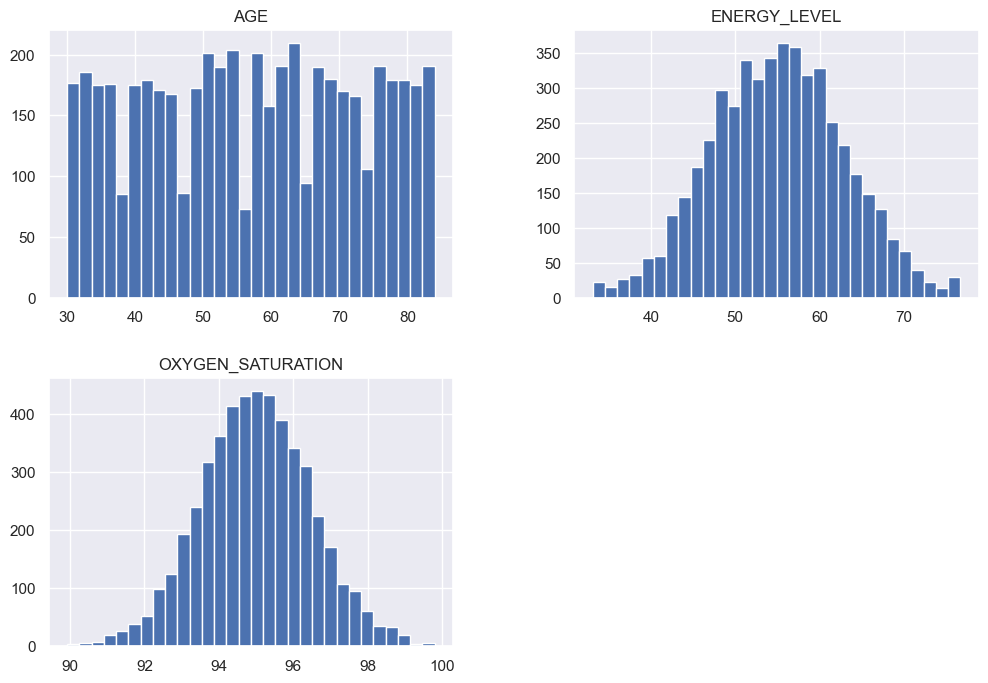

In [50]:
Data[['AGE', 'ENERGY_LEVEL', 'OXYGEN_SATURATION']].hist(figsize = (12, 8), bins = 30)
plt.show()# TO CHECK DISTRIBUTON OF CONTINUOS VARIABLE

AGE HISTOGRAM: The relatively even distribution suggests that the dataset captures a wide range of ages.Peaks in certain age groups may indicate a higher representation of individuals in those age brackets.

ENERGY_LEVEL HISTOGRAM: This chart illustrates the distribution of energy levels, ranging from 30 to 80. The data appears to follow a normal distribution, with a noticeable peak around the range of 50 to 60.

OXYGEN_SATURATION HISTOGRAM: provides the distribution of oxygen saturation levels in the dataset. Oxygen saturation is a critical metric for assessing 
respiratory health, and its normal range is typically between 90% and 100%.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

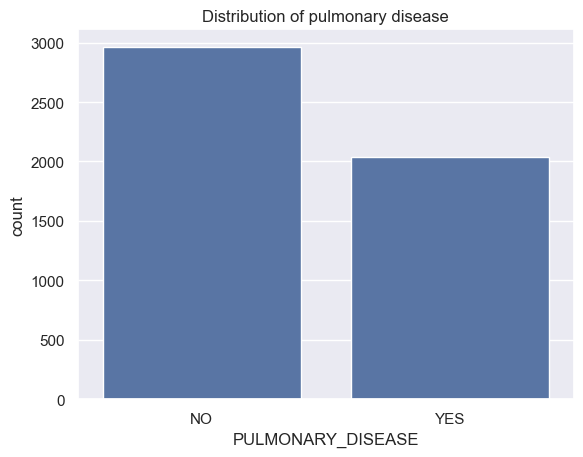

In [54]:
sns.countplot(x = Data['PULMONARY_DISEASE'])
plt.title("Distribution of pulmonary disease")
plt.show()

# Target variable analysis: The dataset is not extremely imbalanced but the difference is notable.

## Categorical features vs. Pulmonary disease

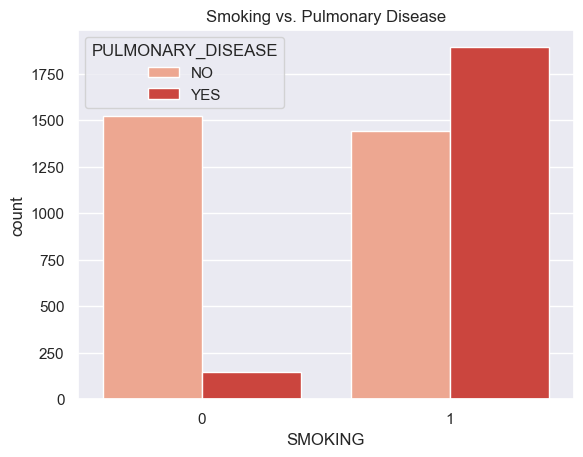

In [51]:
sns.countplot(x='SMOKING', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Smoking vs. Pulmonary Disease')
plt.show()

From the chart above, Non smokers(0) have lower cases of pulmonary disease. However, smokers have more "YES" cases than "NO", therefore, smoking is a major risk factor for Pulmonary Disease. smoking is a predictor of pulmonary disease

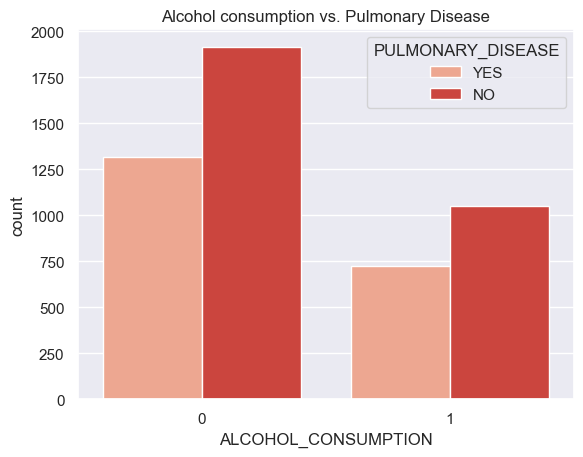

In [56]:
sns.countplot(x='ALCOHOL_CONSUMPTION', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Alcohol consumption vs. Pulmonary Disease')
plt.show()

From the chart above, Alcohol consumption may not be a primary risk factor for pulmonary_disease as there are more "NO" than "YES" cases for those who consume alcohol, therefore, alcohol does not directly contribute to lung disease or its effect are overshadowed by more influential factors

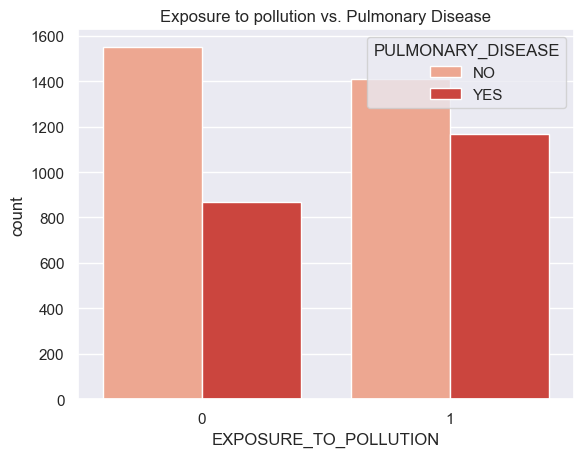

In [58]:
sns.countplot(x='EXPOSURE_TO_POLLUTION', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Exposure to pollution vs. Pulmonary Disease')
plt.show()

FROM THE CHART ABOVE, EXPOSURE_TO_POLLUTION IS NOT A DOMINANT RISK FACTOR FOR PULMONARY DISEASE AS THERE ARE MORE CASES OF "NO" THAN "YES" FOR PEOPLE EXPOSED TO POLLUTION. EXPOSURE TO POLLUTION ALONE MIGHT NOT BE ENOUGH TO CAUSE PULMONARY DISEASE, IT COULD BE ONE OF MANY CONTRIBUTING FACTORS.

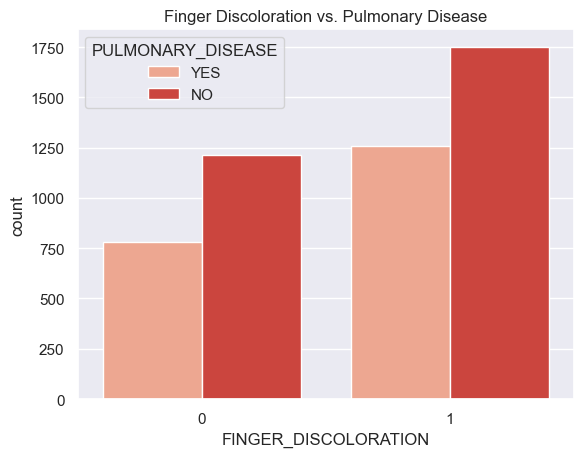

In [60]:
sns.countplot(x='FINGER_DISCOLORATION', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Finger Discoloration vs. Pulmonary Disease')
plt.show()

FROM THE CHART ABOVE, FINGER DISCOLORATION IS NOT A PRIMARY SYMPTOM OF PULMONARY DISEASE AS THERE ARE MORE CASES OF "NO" THAN "YES" FOR PEOPLE WITH FINGER DISCOLORATION, THIS INDICATES THAT FINGER DISCOLORATION IS NOT A RELIABLE INDICATOR OF PULMONARY DISEASE.

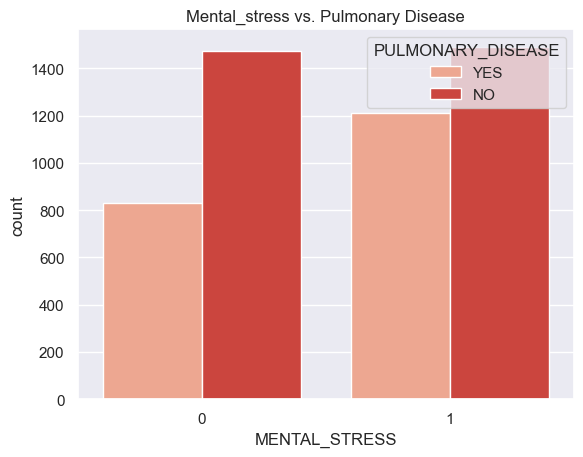

In [62]:
sns.countplot(x='MENTAL_STRESS', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Mental_stress vs. Pulmonary Disease')
plt.show()

FROM THE CHART ABOVE, MENTAL STRESS ALONE IS NOT A STRONG PREDICTOR OF PULMONARY DISEASE AS THERE ARE MORE PULMONARY DISEASE CASES OF "NO" THAN "YES" FOR PEOPLE WITH MENTAL STRESS BUT IT MAY STILL PLAY A ROLE WHEN COMBINED WITH OTHER RISK FACTOR.

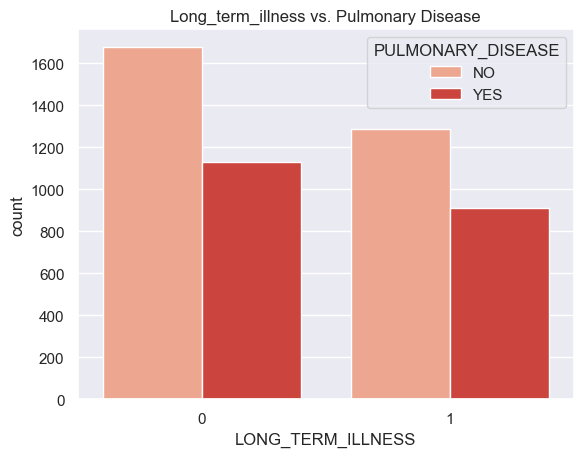

In [64]:
sns.countplot(x='LONG_TERM_ILLNESS', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Long_term_illness vs. Pulmonary Disease')
plt.show()

FROM THE BAR CHART ABOVE, LONG TERM ILLNESS IS NOT A STRONG PREDICTOR OF PULMONARY DISEASE GIVEN THAT "N0" CASES IS GREATER
THAN "YES" CASES WHICH SUGGEST THAT LONG_TERM_ILLNESS ALONE IS NOT A STRONG PREDICTOR OF PULMONARY_DISEASE WHICH INDICATE
THAT NOT ALL LUNG DISEASE PATIENTS HAVE A PRIOR CHRONIC ILLNESS

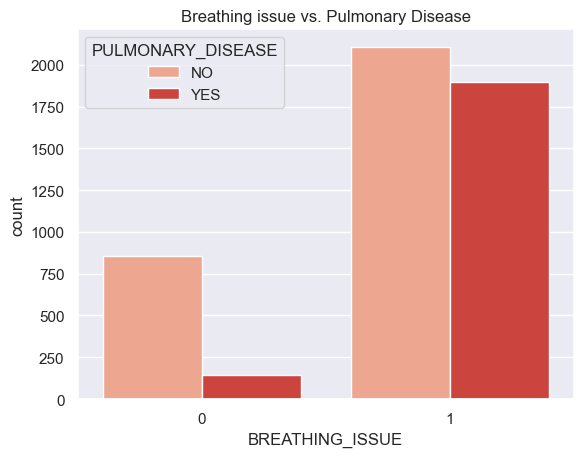

In [66]:
sns.countplot(x='BREATHING_ISSUE', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Breathing issue vs. Pulmonary Disease')
plt.show()

~ Breathing_issue may not be a primary risk factor for pulmonary_disease as there are more "NO" than "YES" cases for those whith breathing_issue, therefore, breathing issue does not directly contribute to lung disease or its effect are overshadowed by more influential factors

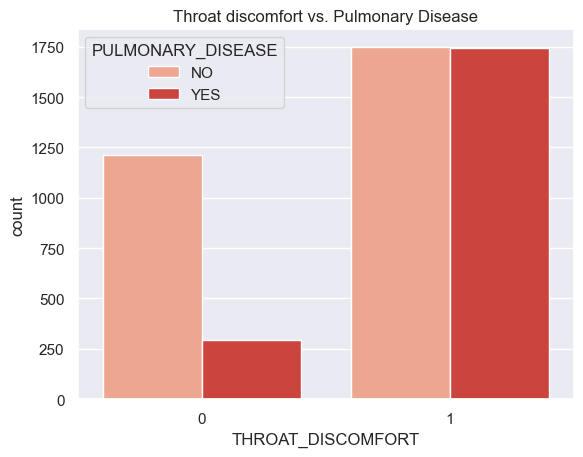

In [68]:
sns.countplot(x='THROAT_DISCOMFORT', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Throat discomfort vs. Pulmonary Disease')
plt.show()

FOR PEOPLE WITHOUT THROAT DISCOMFORT, THE NUMBER OF PEOPLE WITHOUT PULMONARY_DISEASE(0) IS GREATER THAN THOSE WITH PULMONARY_DISEASE WHICH SUGGESTS THAT PEOPLE WITHOUT THROAT DISCOMFORT ARE MORE LIKELY TO BE DISEASE FREE, MEANING THROAT DISCOMFORT MIGHT BE A RISK INDICATOR

FOR PEOPLE WITH THROAT DISCOMFORT, THE NUMBER OF PEOPLE WITH AND WITHOUT PULMONARY DISEASE IS EQUAL. THIS MEANS THAT THROAT DISCOMFORT ALONE DOES NOT STRONGLY DIFFERENTIATE BETWEEN THOSE WHO HAVE PULMONARY DISEASE AND THOSE WHO DO NOT.

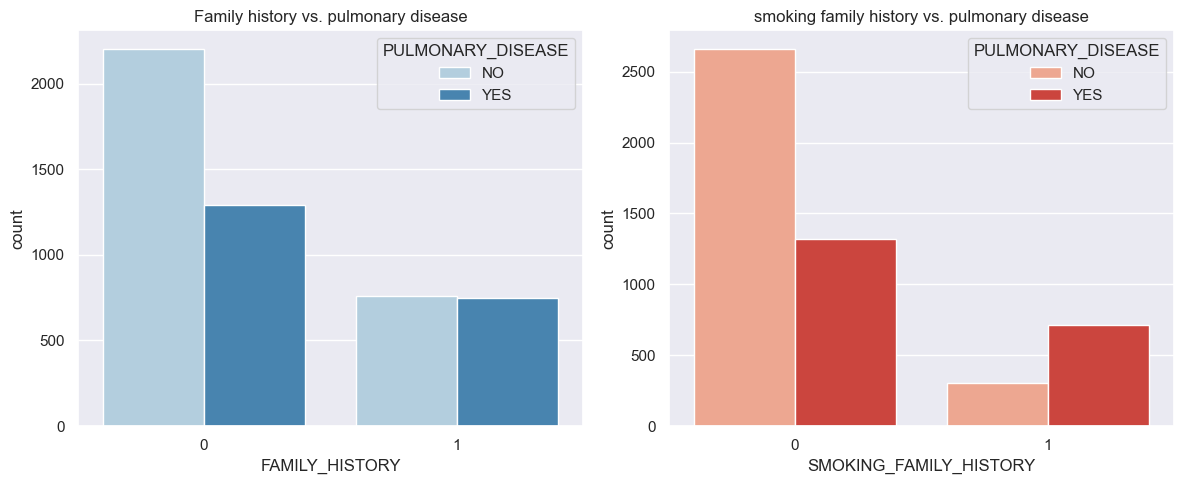

In [70]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(data = Data, x = "FAMILY_HISTORY", hue = "PULMONARY_DISEASE", palette = 'Blues', ax = axes[0])
axes[0].set_title("Family history vs. pulmonary disease")
sns.countplot(data = Data, x = "SMOKING_FAMILY_HISTORY", hue = "PULMONARY_DISEASE", palette = 'Reds', ax = axes[1])
axes[1].set_title("smoking family history vs. pulmonary disease")
plt.tight_layout()
plt.show()

~ FOR FIGURE 1: MORE PEOPLE WITHOUT A FAMILY_HISTORY (0) HAVE PULMONARY DISEASE COMPARED TO THOSE WITH A FAMILY HISTORY. HOWEVER THE DIFFERENCE IS NOT VERY LARGE. THIS SUGGESTS THAT A FAMILY HISTORY OF LUNG DISEASE MAY HAVE SOME IMPACT ON PULMONARY DISEASE, BUT THE DIFFERENCE DOES NOT SEEM SIGNIFICANT

~ FOR FIGURE 2: MORE PEOPLE WIHTOUT A SMOKING FAMILY HISTORY(0) HAVE PULMONARY DISEASE COMPARED TO THOSE WITH A SMOKING FAMILY HISTORY. HOWEVER, A LARGER PROPORTION OF PEOPLE WITH SMOKING FAMILY HISTORY HAVE PULMONARY DISEASE COMPARED TO THOSE WITHOUT IT(0). THIS SUGGEST THAT A SMOKING_FAMILY_HISTORY IS A STRONG PREDICTOR & RISK FACTOR FOR PULMONARY DISEASE AS SEEN FROM THE CHART ABOVE, THE NUMBER OF CASES "YES" IS GREATER THAN "NO"

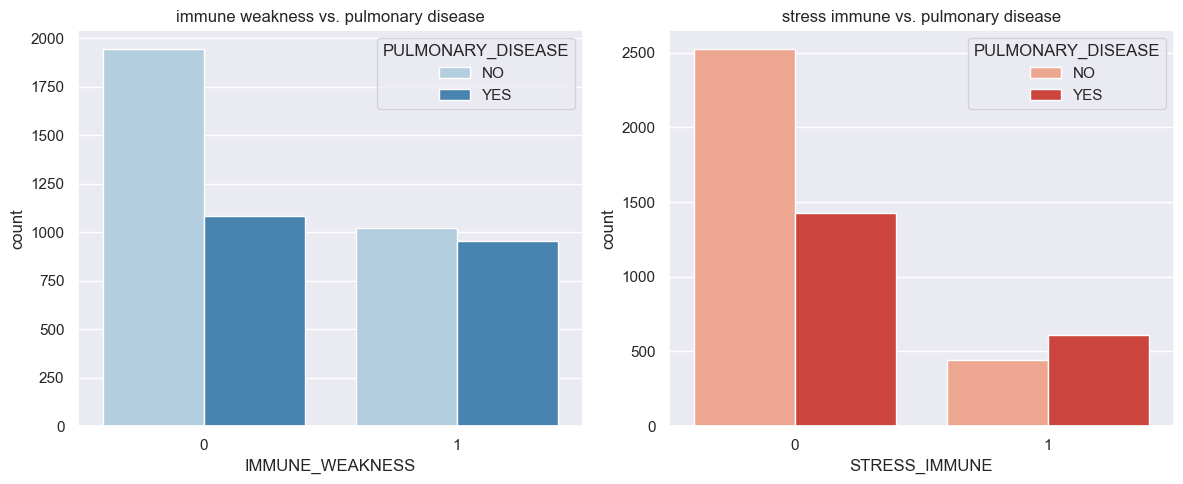

In [72]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(data = Data, x = "IMMUNE_WEAKNESS", hue = "PULMONARY_DISEASE", palette = 'Blues', ax = axes[0])
axes[0].set_title("immune weakness vs. pulmonary disease")
sns.countplot(data = Data, x = "STRESS_IMMUNE", hue = "PULMONARY_DISEASE", palette = 'Reds', ax = axes[1])
axes[1].set_title("stress immune vs. pulmonary disease")
plt.tight_layout()
plt.show()

~FOR FIGURE 1: MOST PEOPLE WITHOUT IMMUNE WEAKNESS(0) HAVE PULMONARY DISEASE COMPARED TO THOSE THAT HAVE(1). HOWEVER, A LARGER PROPORTION OF PEOPLE WITH IMMUNE WEAKNESS HAVE 
PULMONARY DISEASE COMPARED TO THOSE WITHOUT. THIS SUGGEST THAT IMMUNE WEAKNESS MAY INCREASE THE RISK OF PULMONARY DISEASE, BUT MANY PEOPLE WITHOUT IMMUNE WEAKNESS STILL DEVELOP IT

~ FOR THE SECOND CHART, MOST PEOPLE WITHOUT STRESS_IMMUNE(0) HAVE PULMONARY DISEASE AND A HIGHER PROPORTION OF PEOPLE WITH STRESS_IMMUNE HAVE PULMONARY DISEASE 
COMPARED TO THOSE WITHOUT. THIS SUGGESTS THAT STRESS_IMMUNE APPEARS TO BE LINKED TO PULMONARY DISEASE BUT THEY ARE NOT THE ONLY FACTOR

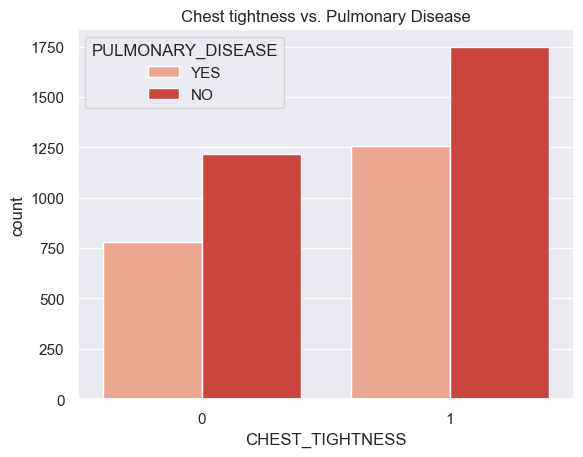

In [74]:
sns.countplot(x='CHEST_TIGHTNESS', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Chest tightness vs. Pulmonary Disease')
plt.show()

FROM THE BAR CHART ABOVE, CHEST_TIGHTNESS IS NOT A STRONG PREDICTOR OF PULMONARY DISEASE GIVEN THAT "N0" CASES IS GREATER
THAN "YES" CASES WHICH SUGGEST THAT CHEST_TIGHTNESS ALONE IS NOT A STRONG PREDICTOR OF PULMONARY_DISEASE WHICH INDICATE
THAT NOT ALL LUNG DISEASE PATIENTS HAVE A PRIOR CHEST_TIGHTNESS

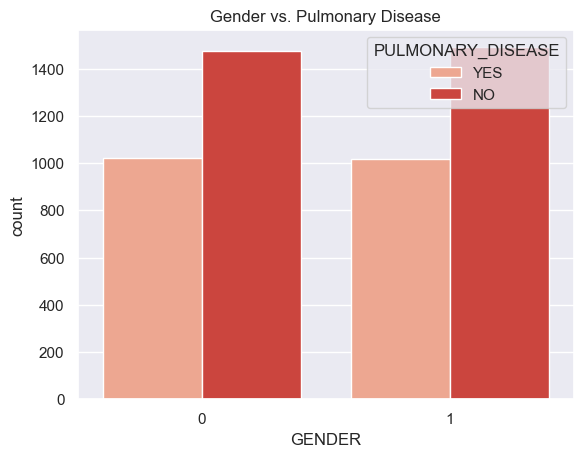

In [76]:
sns.countplot(x='GENDER', hue='PULMONARY_DISEASE', palette = 'Reds', data=Data)
plt.title('Gender vs. Pulmonary Disease')
plt.show()

THE RISK OF PULMONARY DISEASE IS INDEPENDENT OF GENDER IN THIS DATASET. MALES AND FEMALES ARE ALMOST EQUALLY AFFECTED

## MACHINE LEARNING PROPER: FEATURE ENGINEERING

In [38]:
def split_target(data, target_name):
    target = data[[target_name]]
    data.drop(target_name, axis=1, inplace=True)
    return (data, target)

X, y = split_target(Data, 'PULMONARY_DISEASE')

In [40]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
#A11
y_train = y_train.iloc[:X_train.shape[0]].reset_index(drop=True)
y_test = y_test.iloc[:X_test.shape[0]].reset_index(drop=True)

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4000, 17) (4000, 1)
(1000, 17) (1000, 1)


In [46]:
X_train.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
4227,63,1,1,1,1,0,0,49.129678,1,1,1,1,96.295279,0,1,1,1
4676,70,1,1,1,1,1,0,62.047864,0,1,1,0,95.567531,1,0,0,0
800,60,0,1,1,1,1,0,62.311369,1,0,0,1,95.703430,0,0,0,1
3671,40,1,1,1,0,1,0,57.553961,0,1,0,0,95.473254,1,0,0,0
4193,40,0,0,0,0,0,0,50.770248,1,1,0,0,96.618512,0,0,0,0


In [48]:
X_train = X_train.reset_index(drop = True) # TO RESET THE INDEX
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [50]:
print(X_train.shape, y_train.shape) # TO TRAIN AND TEST HAVE THESAME NUMBER OF ROWS
print(X_test.shape, y_test.shape)

(4000, 17) (4000, 1)
(1000, 17) (1000, 1)


In [52]:
y_test

,PULMONARY_DISEASE
0,NO
1,NO
2,NO
3,NO
4,NO
...,...
995,NO
996,NO
997,NO
998,NO


In [54]:
def categorize_age(AGE):
    if AGE < 34:
        return "Young Adult"
    elif AGE >= 35 and AGE <= 49:
        return "Middle Aged"
    elif AGE >= 50 and AGE <= 64:
        return "Senior"
    else:
        return "Elderly"
        
X_train['Age_Group'] = X_train['AGE'].apply(categorize_age)
X_test['Age_Group'] = X_test['AGE'].apply(categorize_age)

In [56]:
X_train

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,Age_Group
0,63,1,1,1,1,0,0,49.129678,1,1,1,1,96.295279,0,1,1,1,Senior
1,70,1,1,1,1,1,0,62.047864,0,1,1,0,95.567531,1,0,0,0,Elderly
2,60,0,1,1,1,1,0,62.311369,1,0,0,1,95.703430,0,0,0,1,Senior
3,40,1,1,1,0,1,0,57.553961,0,1,0,0,95.473254,1,0,0,0,Middle Aged
4,40,0,0,0,0,0,0,50.770248,1,1,0,0,96.618512,0,0,0,0,Middle Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,43,1,0,1,0,1,1,58.775132,1,1,0,1,96.785489,1,0,0,0,Middle Aged
3996,52,1,1,0,1,0,1,66.498005,0,1,1,0,93.476014,1,1,1,0,Senior
3997,75,1,0,0,0,0,0,53.355237,1,1,0,1,92.415700,0,0,0,0,Elderly
3998,43,1,0,1,0,1,0,54.014696,0,1,0,1,95.612891,1,0,0,0,Middle Aged


In [58]:
X_train['INVERSE_ENERGY_LEVEL'] = 1 / X_train['ENERGY_LEVEL'] # i created this feature to help my model learn that low levels of energy level is associated with high risk of lung cancer
X_test['INVERSE_ENERGY_LEVEL'] = 1 / X_test['ENERGY_LEVEL']

In [60]:
X_train['INVERSE_OXYGEN_SATURATION'] = 1 / X_train['OXYGEN_SATURATION'] #i created this feature to help my model learn that low levels of oxygen saturation is associated with high risk of lung cancer
X_test['INVERSE_OXYGEN_SATURATION'] = 1 / X_test['OXYGEN_SATURATION']

In [62]:
X_test

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,Age_Group,INVERSE_ENERGY_LEVEL,INVERSE_OXYGEN_SATURATION
0,80,1,1,0,1,1,1,42.962294,0,0,0,0,95.498690,1,0,0,0,Elderly,0.023276,0.010471
1,74,0,1,1,0,0,0,48.962895,1,1,1,0,97.318646,0,1,1,0,Elderly,0.020424,0.010276
2,42,1,1,0,1,1,0,49.614081,0,1,0,0,91.202324,1,1,1,0,Middle Aged,0.020156,0.010965
3,76,1,0,1,0,1,0,50.644241,0,1,1,0,90.446848,1,0,0,0,Elderly,0.019746,0.011056
4,68,0,1,0,1,0,0,52.762783,0,0,1,1,96.860466,1,1,1,0,Elderly,0.018953,0.010324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40,0,1,1,0,1,1,54.594839,0,1,0,0,97.464691,1,0,0,0,Middle Aged,0.018317,0.010260
996,83,0,1,0,1,0,0,56.936257,0,1,0,0,95.488531,1,0,0,0,Elderly,0.017564,0.010472
997,80,1,0,1,1,1,1,42.551616,1,1,0,1,94.440791,1,0,0,1,Elderly,0.023501,0.010589
998,71,0,1,0,1,1,0,42.357188,0,1,1,1,93.343463,0,0,0,0,Elderly,0.023609,0.010713


## DATA ENCODING

In [64]:
print(X_train['Age_Group'].unique())

['Senior' 'Elderly' 'Middle Aged' 'Young Adult']


In [66]:
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encoder = LabelEncoder()
X_train['Age_Group'] = label_encoder.fit_transform(X_train['Age_Group'])
X_test['Age_Group'] = label_encoder.transform(X_test['Age_Group'])

In [70]:
print(X_train[['Age_Group']].head())
print(X_test[['Age_Group']].head())

   Age_Group
0          2
1          0
2          2
3          1
4          1
   Age_Group
0          0
1          0
2          1
3          0
4          0


In [72]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Elderly': 0, 'Middle Aged': 1, 'Senior': 2, 'Young Adult': 3}


In [74]:
y_test

,PULMONARY_DISEASE
0,NO
1,NO
2,NO
3,NO
4,NO
...,...
995,NO
996,NO
997,NO
998,NO


In [76]:
y_train

,PULMONARY_DISEASE
0,YES
1,YES
2,YES
3,YES
4,NO
...,...
3995,NO
3996,NO
3997,NO
3998,NO


In [80]:
from sklearn.preprocessing import LabelEncoder # ENCODED MY YES TO BE 1 AND NO TO BE 0
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [82]:
print(y_train[:5])

[1 1 1 1 0]


In [84]:
print(y_test[:5])

[0 0 0 0 0]


In [86]:
import pandas as pd
y_train = pd.Series(y_train)

In [88]:
y_train

0       1
1       1
2       1
3       1
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Length: 4000, dtype: int64

In [90]:
y_test = pd.Series(y_test)

In [92]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    1
Length: 1000, dtype: int64

In [94]:
value_counts = Data['GENDER'].value_counts()
print(value_counts)

GENDER
1    2506
0    2494
Name: count, dtype: int64


In [96]:
X_train['GENDER'] = X_train['GENDER'].map({1: 'Female', 0: 'Male'})
X_test['GENDER'] = X_test['GENDER'].map({1: 'Female', 0: 'Male'})

In [98]:
X_test.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,Age_Group,INVERSE_ENERGY_LEVEL,INVERSE_OXYGEN_SATURATION
0,80,Female,1,0,1,1,1,42.962294,0,0,0,0,95.498690,1,0,0,0,0,0.023276,0.010471
1,74,Male,1,1,0,0,0,48.962895,1,1,1,0,97.318646,0,1,1,0,0,0.020424,0.010276
2,42,Female,1,0,1,1,0,49.614081,0,1,0,0,91.202324,1,1,1,0,1,0.020156,0.010965
3,76,Female,0,1,0,1,0,50.644241,0,1,1,0,90.446848,1,0,0,0,0,0.019746,0.011056
4,68,Male,1,0,1,0,0,52.762783,0,0,1,1,96.860466,1,1,1,0,0,0.018953,0.010324


In [100]:
X_train['GENDER'] = X_train['GENDER'].map({'Female': 1, 'Male': 0})
X_test['GENDER'] = X_test['GENDER'].map({'Female': 1, 'Male': 0})

In [102]:
X_test.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,Age_Group,INVERSE_ENERGY_LEVEL,INVERSE_OXYGEN_SATURATION
0,80,1,1,0,1,1,1,42.962294,0,0,0,0,95.498690,1,0,0,0,0,0.023276,0.010471
1,74,0,1,1,0,0,0,48.962895,1,1,1,0,97.318646,0,1,1,0,0,0.020424,0.010276
2,42,1,1,0,1,1,0,49.614081,0,1,0,0,91.202324,1,1,1,0,1,0.020156,0.010965
3,76,1,0,1,0,1,0,50.644241,0,1,1,0,90.446848,1,0,0,0,0,0.019746,0.011056
4,68,0,1,0,1,0,0,52.762783,0,0,1,1,96.860466,1,1,1,0,0,0.018953,0.010324


## DATA SCALING

In [104]:
columns_to_scale = ['AGE', 'INVERSE_OXYGEN_SATURATION', 'INVERSE_ENERGY_LEVEL']

In [106]:
To_scale = ['OXYGEN_SATURATION', 'ENERGY_LEVEL']

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [112]:
scaled = MinMaxScaler()
X_train[To_scale] = scaled.fit_transform(X_train[To_scale])
X_test[To_scale] = scaled.fit_transform(X_test[To_scale])

In [114]:
X_train

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,Age_Group,INVERSE_ENERGY_LEVEL,INVERSE_OXYGEN_SATURATION
0,0.611111,1,1,1,1,0,0,0.367855,1,1,1,1,0.645434,0,1,1,1,2,0.426108,0.331103
1,0.740741,1,1,1,1,1,0,0.664617,0,1,1,0,0.571720,1,0,0,0,0,0.179004,0.402985
2,0.555556,0,1,1,1,1,0,0.670670,1,0,0,1,0.585486,0,0,0,1,2,0.175029,0.389479
3,0.185185,1,1,1,0,1,0,0.561381,0,1,0,0,0.562171,1,0,0,0,1,0.252383,0.412377
4,0.185185,0,0,0,0,0,0,0.405543,1,1,0,0,0.678174,0,0,0,0,1,0.387756,0.299524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.240741,1,0,1,0,1,1,0.589434,1,1,0,1,0.695087,1,0,0,0,1,0.231332,0.283294
3996,0.407407,1,1,0,1,0,1,0.766847,0,1,1,0,0.359871,1,1,1,0,2,0.116113,0.615799
3997,0.833333,1,0,0,0,0,0,0.464927,1,1,0,1,0.252472,0,0,0,0,0,0.332111,0.727366
3998,0.240741,1,0,1,0,1,0,0.480076,0,1,0,1,0.576315,1,0,0,0,1,0.318769,0.398472


## DATA BALANCING

In [116]:
print(pd.Series(y_train).value_counts())

0    2392
1    1608
Name: count, dtype: int64


In [118]:
from imblearn.over_sampling import SMOTE

In [120]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [122]:
print (pd.Series(y_train_resampled).value_counts())

1    2392
0    2392
Name: count, dtype: int64


## FEATURE SELECTION

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
corr_matrix = X_train_resampled.corr()

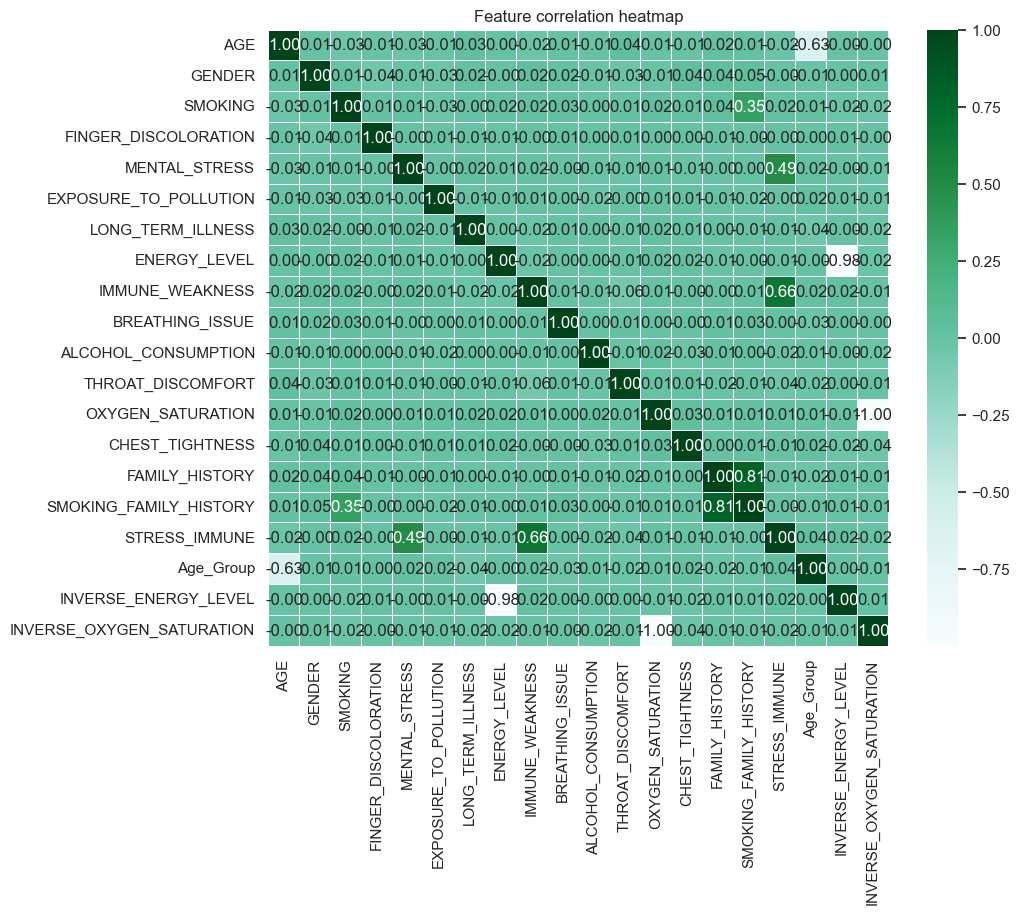

In [128]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BuGn", fmt=".2f", linewidth=0.5)
plt.title("Feature correlation heatmap")
plt.show()

In [130]:
print(corr_matrix.head())

                           AGE    GENDER   SMOKING  FINGER_DISCOLORATION  \
AGE                   1.000000  0.013630 -0.032205             -0.008919   
GENDER                0.013630  1.000000  0.014243             -0.043678   
SMOKING              -0.032205  0.014243  1.000000              0.014849   
FINGER_DISCOLORATION -0.008919 -0.043678  0.014849              1.000000   
MENTAL_STRESS        -0.027805 -0.014749  0.008556             -0.001103   

                      MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  \
AGE                       -0.027805              -0.010567           0.030234   
GENDER                    -0.014749              -0.026821           0.020109   
SMOKING                    0.008556              -0.027587          -0.001002   
FINGER_DISCOLORATION      -0.001103               0.005986          -0.009789   
MENTAL_STRESS              1.000000              -0.002860           0.024042   

                      ENERGY_LEVEL  IMMUNE_WEAKNESS  BRE

## FEATURE SELECTION: I DID THIS BY TRAINING AN INTERIM MACHINE LEARNING MODEL

In [132]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [134]:
X_train_resampled.shape

(4784, 20)

In [136]:
y_train_resampled.shape

(4784,)

In [138]:
X_train_resampled = X_train_resampled.reset_index(drop = True)
y_train_resampled = y_train_resampled.reset_index(drop = True)

In [140]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(X_test.shape, y_test.shape)

(4784, 20) (4784,)
(1000, 20) (1000,)


In [142]:
assert len(X_train_resampled) == len(y_train_resampled), "Mismatch in length after resampling"

In [146]:
y_train_resampled = y_train_resampled.ravel() # CONVERTED MY Y_TRAIN TO A 1D ARRAY 

In [148]:
y_train_resampled

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [150]:
print(X_train_resampled.shape)

(4784, 20)


In [152]:
print(y_train_resampled.shape)

(4784,)


In [166]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [168]:
feature_importances = dt_classifier.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train_resampled.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending = False)
for index, row in importance_df.iterrows():
    print('{}: {:.4f}'.format(row["Feature"], row["Importance"]))

SMOKING: 0.2312
BREATHING_ISSUE: 0.1135
THROAT_DISCOMFORT: 0.1128
ENERGY_LEVEL: 0.1071
STRESS_IMMUNE: 0.0837
AGE: 0.0602
INVERSE_ENERGY_LEVEL: 0.0487
INVERSE_OXYGEN_SATURATION: 0.0424
OXYGEN_SATURATION: 0.0422
EXPOSURE_TO_POLLUTION: 0.0388
FAMILY_HISTORY: 0.0295
SMOKING_FAMILY_HISTORY: 0.0207
Age_Group: 0.0132
FINGER_DISCOLORATION: 0.0106
GENDER: 0.0089
LONG_TERM_ILLNESS: 0.0086
CHEST_TIGHTNESS: 0.0080
MENTAL_STRESS: 0.0078
ALCOHOL_CONSUMPTION: 0.0062
IMMUNE_WEAKNESS: 0.0059


In [170]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [174]:
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train_resampled.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending = False)
for index, row in importance_df.iterrows():
    print('{}: {:.4f}'.format(row["Feature"], row["Importance"]))

SMOKING: 0.1939
BREATHING_ISSUE: 0.0967
THROAT_DISCOMFORT: 0.0945
ENERGY_LEVEL: 0.0936
INVERSE_ENERGY_LEVEL: 0.0868
OXYGEN_SATURATION: 0.0624
INVERSE_OXYGEN_SATURATION: 0.0621
AGE: 0.0583
SMOKING_FAMILY_HISTORY: 0.0559
STRESS_IMMUNE: 0.0353
EXPOSURE_TO_POLLUTION: 0.0268
FAMILY_HISTORY: 0.0210
IMMUNE_WEAKNESS: 0.0193
Age_Group: 0.0184
MENTAL_STRESS: 0.0162
LONG_TERM_ILLNESS: 0.0123
GENDER: 0.0122
FINGER_DISCOLORATION: 0.0120
CHEST_TIGHTNESS: 0.0113
ALCOHOL_CONSUMPTION: 0.0112


In [176]:
top_10 = ['SMOKING', 'INVERSE_ENERGY_LEVEL', 'BREATHING_ISSUE',
       'THROAT_DISCOMFORT', 'STRESS_IMMUNE', 'INVERSE_OXYGEN_SATURATION', 'AGE',
       'EXPOSURE_TO_POLLUTION', 'SMOKING_FAMILY_HISTORY', 'GENDER']

In [178]:
X_train_n = X_train_resampled[top_10]
X_test_n = X_test[top_10]

In [180]:
X_test_n.head()

,SMOKING,INVERSE_ENERGY_LEVEL,BREATHING_ISSUE,THROAT_DISCOMFORT,STRESS_IMMUNE,INVERSE_OXYGEN_SATURATION,AGE,EXPOSURE_TO_POLLUTION,SMOKING_FAMILY_HISTORY,GENDER
0,1,0.596489,0,0,0,0.409841,0.925926,1,0,1
1,1,0.430151,1,0,0,0.231842,0.814815,0,1,0
2,1,0.414520,1,0,0,0.858222,0.222222,1,1,1
3,0,0.390614,1,0,0,0.941470,0.851852,1,0,1
4,1,0.344383,0,1,0,0.276024,0.703704,0,1,0


## MODEL TRAINING AND MODEL EVALUATION

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [184]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_n, y_train_resampled)

LogisticRegression(random_state=42)

In [186]:
y_pred = logreg.predict(X_test_n)

In [188]:
print("Acurracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurracy: 0.881
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       571
           1       0.81      0.94      0.87       429

    accuracy                           0.88      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.88      0.88      1000



In [190]:
from sklearn.model_selection import cross_val_score

In [192]:
scores = cross_val_score(logreg, X_train_n, y_train_resampled, cv = 5, scoring = 'accuracy')
print("cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

cross-validation Accuracy Scores: [0.89028213 0.88087774 0.87460815 0.87878788 0.87866109]
Mean Accuracy: 0.8806433983464714


In [194]:
from sklearn.metrics import roc_auc_score

In [196]:
y_probs = logreg.predict_proba(X_test_n)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9382427263337947


In [198]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

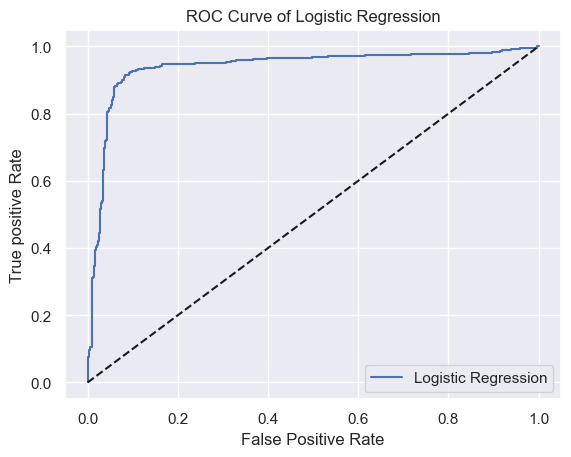

In [200]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()

The AUC-ROC curve demonstrates the model's strong performance in classification tasks. The curve's position above the diagonal baseline indicates effective discrimination between positive and negative classes, reflecting a good balance between sensitivity and specificity.

In [202]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

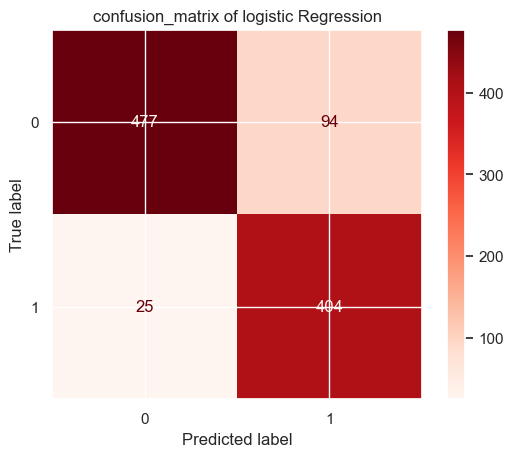

In [204]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Reds')
plt.title("confusion_matrix of logistic Regression")
plt.show()

TRUE POSITIVES = 404, TRUE NEGATIVES = 477, FALSE POSITIVES = 94, FALSE NEGATIVES = 25. The model demonstrates a strong recall, effectively identifying most at risk patient, with a reasonable precision and overall balanced performance

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [208]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_n, y_train_resampled)

RandomForestClassifier(random_state=42)

In [210]:
y_predd = rf.predict(X_test_n)

In [212]:
print("Accuracy:", accuracy_score(y_test, y_predd))
print(classification_report(y_test, y_predd))

Accuracy: 0.919
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       571
           1       0.90      0.91      0.91       429

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [215]:
scores = cross_val_score(rf, X_train_n, y_train_resampled, cv = 5, scoring = 'accuracy')
print("cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

cross-validation Accuracy Scores: [0.89341693 0.89864159 0.91013584 0.90282132 0.91213389]
Mean Accuracy: 0.9034299130389162


In [217]:
y_probbs = rf.predict_proba(X_test_n)[:, 1]
roc_auc = roc_auc_score(y_test, y_probbs)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.939377610130675


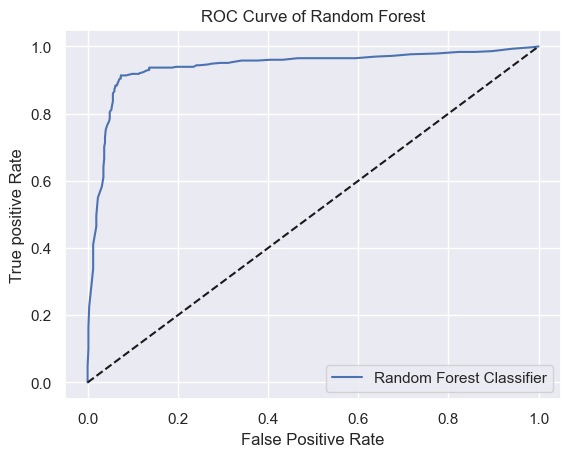

In [219]:
fpr, tpr, _ = roc_curve(y_test, y_probbs)
plt.plot(fpr, tpr, label = 'Random Forest Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()
plt.show()

The AUC-ROC curve shows that the model effectively distinguishes between classes, as indicated by the ROC curve's steep rise 
and proximity to the top left corner. This showcases its high accuracy in predicting true positives while minimizing false 
positives.

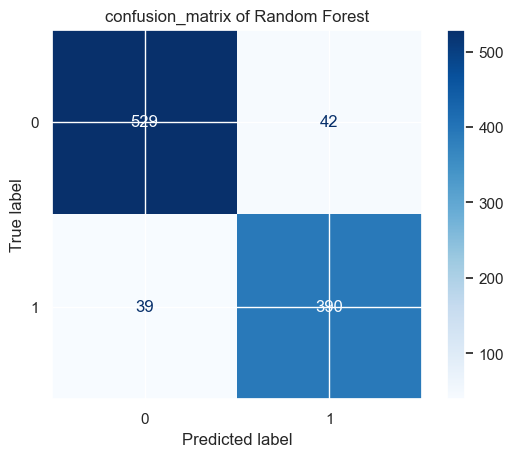

In [221]:
cm = confusion_matrix(y_test, y_predd)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title("confusion_matrix of Random Forest")
plt.show()

In [ ]:
TRUE POSITIVES = 390, TRUE NEGATIVES = 529, FALSE POSITIVES = 42, FALSE NEGATIVES = 39. The model demonstrates a strong balance between correctly identifying 
high risk patients and minimizing false predictions


In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
Knn = KNeighborsClassifier(n_neighbors = 5)
Knn.fit(X_train_n, y_train_resampled)

KNeighborsClassifier()

In [227]:
y_pred = Knn.predict(X_test_n)

In [229]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.891
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       571
           1       0.84      0.92      0.88       429

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [231]:
scores = cross_val_score(Knn, X_train_n, y_train_resampled, cv = 5, scoring = 'accuracy')
print("cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

cross-validation Accuracy Scores: [0.86938349 0.87983281 0.88296761 0.87460815 0.88493724]
Mean Accuracy: 0.8783458594019841


In [233]:
y_probss = Knn.predict_proba(X_test_n)[:, 1]
roc_auc = roc_auc_score(y_test, y_probss)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9290758861687058


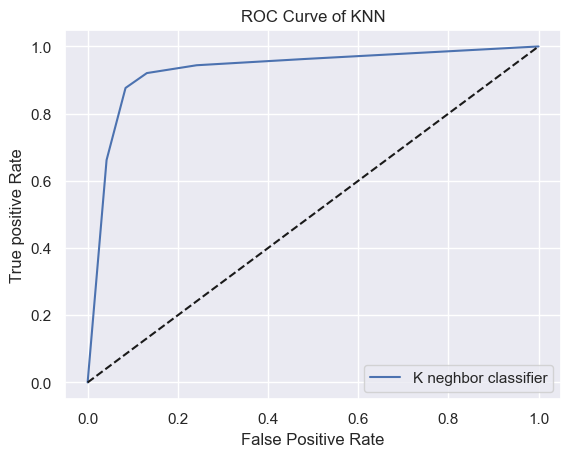

In [235]:
fpr, tpr, _ = roc_curve(y_test, y_probss)
plt.plot(fpr, tpr, label = 'K neghbor classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Curve of KNN')
plt.legend()
plt.show()

The AUC-ROC curve demonstrates high performance, as evidenced by the steep rise in the curve, indicating a good balance 
of sensitivity and specificity.


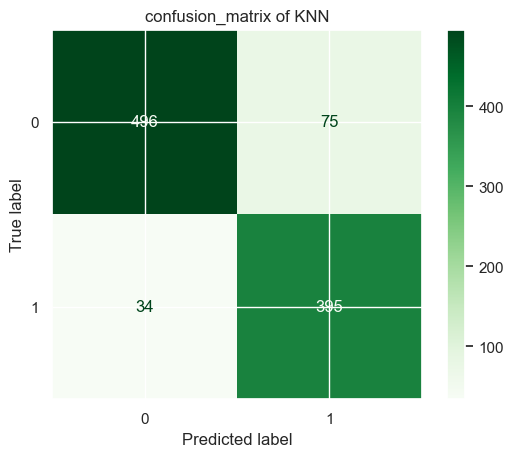

In [237]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Greens')
plt.title("confusion_matrix of KNN")
plt.show()

TRUE POSITIVES = 395, FALSE NEGATIVES =34 , FALSE POSITIVES = 75 AND TRUE NEGATIVES = 496. THE MODEL SHOWS HIGH RECALL BUT PRECISION IS SLIGHTLY LOWER. 
The model demonstrates strong performance, particularly in identifying high risk patients.

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt.fit(X_train_n, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [243]:
y_pred = dt.predict(X_test_n)

In [245]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.869
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       571
           1       0.85      0.85      0.85       429

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



In [247]:
scores = cross_val_score(dt, X_train_n, y_train_resampled, cv = 5, scoring = 'accuracy')
print("cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

cross-validation Accuracy Scores: [0.85370951 0.85161964 0.84952978 0.84535005 0.86610879]
Mean Accuracy: 0.8532635546053523


In [249]:
y_probsss = dt.predict_proba(X_test_n)[:, 1]
roc_auc = roc_auc_score(y_test, y_probsss)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9153960458689004


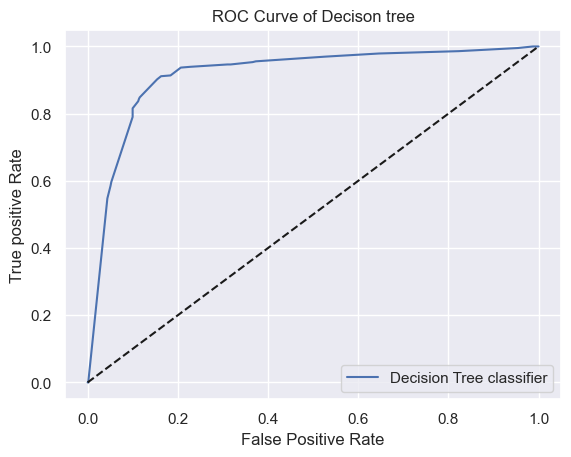

In [251]:
fpr, tpr, _ = roc_curve(y_test, y_probsss)
plt.plot(fpr, tpr, label = 'Decision Tree classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Curve of Decison tree')
plt.legend()
plt.show()

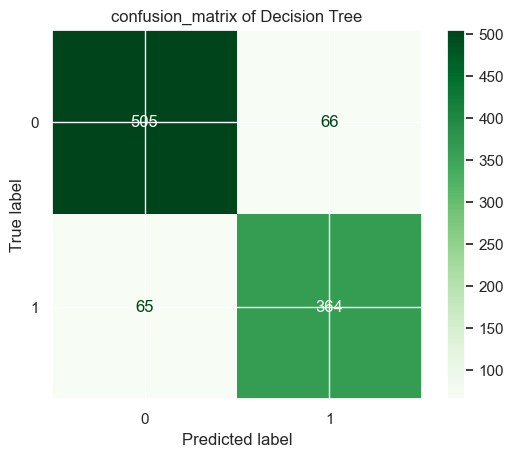

In [253]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Greens')
plt.title("confusion_matrix of Decision Tree")
plt.show()

TRUE POSITIVES = 364, FALSE POSITIVES = 66, FALSE NEGATIVES = 65 AND TRUE NEGATIVES = 505. THE MODEL PERFORMED WELL, WITH A BALANCED TREADE-OFF BETWEEN PRECISION AND RECALL, THOUGH IT SLIGHTLY UNDERPERFORMSIN IDENTIFYING SOME POSITIVE CASES (FN = 65)

## MODEL DEPLOYMENT

In [262]:
!pip install streamlit scikit-learn

In [264]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

In [266]:
from imblearn.pipeline import Pipeline

In [268]:
import joblib

In [270]:
joblib.dump(logreg, 'logreg_model.pkl')

['logreg_model.pkl']

In [272]:
joblib.dump(scaler, 'scaler.pkl')  # Saves the scaler object to 'scaler.pkl'

['scaler.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# I Load the trained model and pre-fitted scaler
model = joblib.load(open('logreg_model.pkl', 'rb'))  # Logistic regression model
scaler = joblib.load(open('scaler.pkl', 'rb'))  # Pre-fitted scaler for scaled features

def preprocess_input_data(age, inverse_oxygen_saturation, inverse_energy_level, smoking, breathing_issue,
                          throat_discomfort, stress_immune, pollution_exposure,
                          smoking_family_history, gender):
    """
    Reverse the inverses and dynamically adjust the scaled values for correct risk interpretation.
    """
    # Prepare DataFrame for scaling
    scaled_features = pd.DataFrame({
        'AGE': [age],
        'INVERSE_OXYGEN_SATURATION': [inverse_oxygen_saturation],
        'INVERSE_ENERGY_LEVEL': [inverse_energy_level]
    })

    # Scale the features using the scaler
    scaled_features = scaler.transform(scaled_features)

    # **Reverse scaled values for risk alignment**
    reversed_energy_level = 1 - scaled_features[0][2]  # Flip the energy level scaling
    reversed_oxygen_saturation = 1 - scaled_features[0][1]  # Flip the oxygen saturation scaling

    # Create input data with reversed scaled values and other unscaled features in the correct order
    input_data = pd.DataFrame({
        'SMOKING': [smoking],
        'INVERSE_ENERGY_LEVEL': [reversed_energy_level],
        'BREATHING_ISSUE': [breathing_issue],
        'THROAT_DISCOMFORT': [throat_discomfort],
        'STRESS_IMMUNE': [stress_immune],
        'INVERSE_OXYGEN_SATURATION': [reversed_oxygen_saturation],
        'AGE': [scaled_features[0][0]],  # Scaled
        'EXPOSURE_TO_POLLUTION': [pollution_exposure],
        'SMOKING_FAMILY_HISTORY': [smoking_family_history],
        'GENDER': [gender]
    })

    return input_data

def main():
    st.title("Lung Cancer Risk Prediction App")
    st.write("Enter the patient's information below:")

    # Collect user inputs
    smoking = 1 if st.selectbox("Do you smoke?", options=["YES", "NO"]) == "YES" else 0
    inverse_energy_level = 1 / st.slider("Energy Level (33-76)", min_value=33, max_value=76)
    breathing_issue = 1 if st.selectbox("Do you have breathing issues?", options=["YES", "NO"]) == "YES" else 0
    throat_discomfort = 1 if st.selectbox("Do you have throat discomfort?", options=["YES", "NO"]) == "YES" else 0
    stress_immune = st.selectbox("Stress Immune (1 = High, 0 = Low)", options=[1, 0])
    inverse_oxygen_saturation = 1 / st.slider("Oxygen Saturation (89.9-99.9)", min_value=89.9, max_value=99.9, step=0.1)
    age = st.number_input("Enter Age (32-84)", min_value=32, max_value=84)
    pollution_exposure = 1 if st.selectbox("Are you exposed to pollution?", options=["YES", "NO"]) == "YES" else 0
    smoking_family_history = 1 if st.selectbox("Is there a family history of smoking?", options=["YES", "NO"]) == "YES" else 0
    gender = st.selectbox("Gender (1 = Female, 0 = Male)", options=[1, 0])

    # Preprocess inputs
    input_data = preprocess_input_data(
        age, inverse_oxygen_saturation, inverse_energy_level, smoking, breathing_issue,
        throat_discomfort, stress_immune, pollution_exposure, smoking_family_history, gender
    )

    # Predict button functionality
    if st.button('Predict'):
        # Make predictions using the trained model
        make_prediction = model.predict_proba(input_data)
        prob_not_at_risk = make_prediction[0][0]
        prob_at_risk = make_prediction[0][1]

        # Display predictions
        st.success(f"The probability of being at risk of lung cancer: {prob_at_risk * 100:.2f}%")
        st.success(f"The probability of not being at risk of lung cancer: {prob_not_at_risk * 100:.2f}%")

if __name__ == '__main__':
    main()

In [ ]:
https://lung-cancer-prediction-app-dzqppsagpduascbj8zbdf8.streamlit.app/
# streamlit webb application link